In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# GeoTiff Images
import rasterio
from osgeo import gdal

# Visualisation
from matplotlib import pyplot as plt
import matplotlib.image as img
from matplotlib.pyplot import figure
from PIL import Image

# Model Building
import ultralytics
from ultralytics import YOLO
import labelme2yolo

# Others
import os
import shutil
import zipfile

%matplotlib inline

In [2]:
def rename_files(directory_path, prefix):
    # Define the directory path where your files are located
    directory_path = directory_path
    
    # Get a list of all files in the directory
    files = os.listdir(directory_path)
    
    # Loop through each file in the directory
    for filename in files:
        # Check if the item is a file (not a directory)
        if os.path.isfile(os.path.join(directory_path, filename)):
            # Replace the word "tile" with the prefix of choice
            new_filename = filename.replace("tile", prefix)
    
            # Construct the full path to the original and new files
            old_filepath = os.path.join(directory_path, filename)
            new_filepath = os.path.join(directory_path, new_filename)
    
            # Rename the file
            os.rename(old_filepath, new_filepath)
    
    print("Files renamed successfully.")

In [4]:
rename_files("../ALL_DATA", "Pre")

Files renamed successfully.


In [5]:
!labelme2yolo --json_dir T:/EY_Challenge/EY_Challenge/ALL_DATA
!labelme2yolo --json_dir ./Annotated_Data

INFO:labelme2yolo:Converting train set ...

100%|██████████| 60/60 [00:04<00:00, 12.29it/s]
INFO:labelme2yolo:Converting val set ...

100%|██████████| 15/15 [00:01<00:00, 12.49it/s]
INFO:labelme2yolo:Converting test set ...

0it [00:00, ?it/s]
0it [00:00, ?it/s]
INFO:labelme2yolo:Converting train set ...

0it [00:00, ?it/s]
0it [00:00, ?it/s]
INFO:labelme2yolo:Converting val set ...

0it [00:00, ?it/s]
0it [00:00, ?it/s]
INFO:labelme2yolo:Converting test set ...

0it [00:00, ?it/s]
0it [00:00, ?it/s]


In [6]:
#Loading the model
model = YOLO('yolov8n.pt')
# Display model information (optional)
model.info()

YOLOv8n summary: 225 layers, 3157200 parameters, 0 gradients, 8.9 GFLOPs


(225, 3157200, 0, 8.8575488)

In [7]:
# Train the model on the dataset for 50 epochs
results = model.train(data="../ALL_DATA/YOLODataset/dataset.yaml", epochs=50, imgsz=512)

New https://pypi.org/project/ultralytics/8.1.24 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.13 🚀 Python-3.9.17 torch-2.0.1 CUDA:0 (NVIDIA GeForce RTX 3070 Ti, 8192MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=../ALL_DATA/YOLODataset/dataset.yaml, epochs=50, time=None, patience=50, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train9, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None,

train: Scanning T:\EY_Challenge\EY_Challenge\ALL_DATA\YOLODataset\labels\train... 60 images, 13 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<00:00, 768.37it/s]

train: New cache created: T:\EY_Challenge\EY_Challenge\ALL_DATA\YOLODataset\labels\train.cache



val: Scanning T:\EY_Challenge\EY_Challenge\ALL_DATA\YOLODataset\labels\val... 15 images, 0 backgrounds, 0 corrupt: 100%|██████████| 15/15 [00:00<00:00, 224.97it/s]

val: New cache created: T:\EY_Challenge\EY_Challenge\ALL_DATA\YOLODataset\labels\val.cache


Plotting labels to runs\detect\train9\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 512 train, 512 val
Using 8 dataloader workers
Logging results to runs\detect\train9
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.74G      1.721      4.015      1.571        167        512: 100%|██████████| 5/5 [00:01<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]

                   all         15        174    0.00959      0.254     0.0192    0.00853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      1.74G      1.785      4.013      1.572        250        512: 100%|██████████| 5/5 [00:00<00:00,  9.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.49it/s]

                   all         15        174    0.00963      0.252     0.0341     0.0243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      1.67G        1.6      3.771      1.366        294        512: 100%|██████████| 5/5 [00:00<00:00,  9.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.23it/s]

                   all         15        174    0.00964      0.223     0.0444     0.0295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      1.76G       1.45      3.348      1.257        246        512: 100%|██████████| 5/5 [00:00<00:00, 10.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.50it/s]

                   all         15        174     0.0121      0.263     0.0591     0.0354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      1.74G      1.554      3.085      1.276        191        512: 100%|██████████| 5/5 [00:00<00:00, 10.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.72it/s]

                   all         15        174     0.0124      0.266     0.0653     0.0403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      1.76G      1.543      2.773      1.282        279        512: 100%|██████████| 5/5 [00:00<00:00, 10.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.51it/s]

                   all         15        174      0.627     0.0379     0.0891     0.0543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      1.74G      1.508      2.387      1.265        169        512: 100%|██████████| 5/5 [00:00<00:00,  9.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.01it/s]

                   all         15        174      0.518     0.0799      0.152     0.0895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      1.61G      1.575      2.335      1.267        171        512: 100%|██████████| 5/5 [00:00<00:00, 10.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.62it/s]

                   all         15        174      0.457      0.145      0.215      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      1.75G      1.504      2.253      1.237        204        512: 100%|██████████| 5/5 [00:00<00:00,  9.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.81it/s]

                   all         15        174      0.291      0.346      0.276      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      1.86G      1.613      1.973      1.278        185        512: 100%|██████████| 5/5 [00:00<00:00, 10.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.18it/s]

                   all         15        174      0.266      0.376      0.269       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      1.75G      1.572      1.958      1.248        279        512: 100%|██████████| 5/5 [00:00<00:00, 10.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.06it/s]

                   all         15        174      0.217      0.455      0.219      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      1.75G      1.441      1.863       1.22         95        512: 100%|██████████| 5/5 [00:00<00:00, 10.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.74it/s]

                   all         15        174      0.218      0.484      0.233      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      1.77G      1.456      1.801      1.241        195        512: 100%|██████████| 5/5 [00:00<00:00, 10.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.99it/s]

                   all         15        174      0.229      0.473      0.236      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      1.75G      1.517      1.772      1.248        241        512: 100%|██████████| 5/5 [00:00<00:00, 10.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.26it/s]

                   all         15        174      0.266      0.461      0.255      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      1.74G      1.496      1.817      1.241        192        512: 100%|██████████| 5/5 [00:00<00:00, 10.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.33it/s]

                   all         15        174      0.255      0.506      0.263      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      1.65G      1.464      1.672      1.221        286        512: 100%|██████████| 5/5 [00:00<00:00, 11.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.22it/s]

                   all         15        174      0.269      0.474      0.256      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      1.63G      1.478      1.534      1.197        225        512: 100%|██████████| 5/5 [00:00<00:00, 10.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.41it/s]

                   all         15        174       0.25      0.476      0.227      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      1.77G      1.461      1.543      1.222        295        512: 100%|██████████| 5/5 [00:00<00:00, 11.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.19it/s]

                   all         15        174      0.295      0.441      0.231      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      1.82G      1.483      1.518      1.187        253        512: 100%|██████████| 5/5 [00:00<00:00, 10.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.54it/s]

                   all         15        174      0.329      0.435       0.25      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      1.76G      1.449      1.635      1.182        122        512: 100%|██████████| 5/5 [00:00<00:00, 10.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.43it/s]

                   all         15        174      0.257      0.438      0.259      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      1.75G      1.409      1.585      1.194        227        512: 100%|██████████| 5/5 [00:00<00:00, 10.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.86it/s]

                   all         15        174       0.21      0.373      0.246      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      1.73G      1.421        1.6        1.2        123        512: 100%|██████████| 5/5 [00:00<00:00, 11.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.36it/s]

                   all         15        174      0.513      0.328      0.255      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      1.74G      1.401      1.525      1.194        122        512: 100%|██████████| 5/5 [00:00<00:00, 10.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.83it/s]

                   all         15        174      0.533       0.34      0.285      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      1.74G      1.425      1.522        1.2        175        512: 100%|██████████| 5/5 [00:00<00:00, 10.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.93it/s]

                   all         15        174      0.402      0.478      0.356      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      1.65G      1.461      1.606      1.251        153        512: 100%|██████████| 5/5 [00:00<00:00, 11.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.74it/s]

                   all         15        174      0.292       0.51      0.394      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      1.65G      1.421      1.541      1.239        180        512: 100%|██████████| 5/5 [00:00<00:00, 11.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.27it/s]

                   all         15        174      0.333      0.518      0.417      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      1.79G      1.434      1.436      1.183        225        512: 100%|██████████| 5/5 [00:00<00:00, 11.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.00it/s]

                   all         15        174       0.37      0.513        0.4      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      1.76G      1.433      1.348      1.175        226        512: 100%|██████████| 5/5 [00:00<00:00, 10.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.51it/s]

                   all         15        174       0.36      0.474      0.369      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      1.59G      1.407      1.495      1.165        421        512: 100%|██████████| 5/5 [00:00<00:00, 11.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.98it/s]

                   all         15        174      0.411      0.484      0.425      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      1.74G       1.41      1.465      1.174        280        512: 100%|██████████| 5/5 [00:00<00:00, 11.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.41it/s]

                   all         15        174      0.401      0.562      0.425      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      1.76G      1.377        1.4      1.172        252        512: 100%|██████████| 5/5 [00:00<00:00, 11.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.74it/s]

                   all         15        174      0.402      0.599      0.424      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      1.75G      1.413      1.466      1.221        191        512: 100%|██████████| 5/5 [00:00<00:00, 10.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.58it/s]

                   all         15        174      0.478      0.525      0.422      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      1.67G      1.399      1.409      1.205        154        512: 100%|██████████| 5/5 [00:00<00:00, 11.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.64it/s]

                   all         15        174      0.463      0.574      0.424      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      1.76G      1.363      1.402      1.176        221        512: 100%|██████████| 5/5 [00:00<00:00, 11.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.38it/s]

                   all         15        174      0.492      0.575      0.454      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      1.76G      1.379      1.367      1.185        237        512: 100%|██████████| 5/5 [00:00<00:00, 11.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.52it/s]

                   all         15        174        0.5      0.562      0.449      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      1.75G      1.373       1.36      1.143        412        512: 100%|██████████| 5/5 [00:00<00:00, 10.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.05it/s]

                   all         15        174      0.479      0.578      0.462       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      1.76G       1.32        1.3      1.159        186        512: 100%|██████████| 5/5 [00:00<00:00, 11.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.00it/s]

                   all         15        174      0.489      0.536      0.461      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      1.72G      1.336      1.363      1.148        166        512: 100%|██████████| 5/5 [00:00<00:00, 10.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.72it/s]


                   all         15        174       0.51      0.525      0.479      0.254

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      1.86G      1.351       1.35       1.18        220        512: 100%|██████████| 5/5 [00:00<00:00, 11.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.20it/s]

                   all         15        174      0.501      0.535      0.485      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      1.76G      1.364      1.224      1.163        238        512: 100%|██████████| 5/5 [00:00<00:00, 10.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.42it/s]

                   all         15        174      0.496      0.555      0.474      0.248


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      1.74G      1.362      1.445        1.2        115        512: 100%|██████████| 5/5 [00:00<00:00,  9.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.63it/s]

                   all         15        174       0.47      0.535      0.481      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      1.65G      1.301      1.613      1.177         65        512: 100%|██████████| 5/5 [00:00<00:00, 11.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.99it/s]

                   all         15        174      0.538      0.503      0.499      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      1.75G       1.31      1.431      1.179        144        512: 100%|██████████| 5/5 [00:00<00:00, 12.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.65it/s]

                   all         15        174       0.54      0.517      0.517      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      1.72G      1.311       1.33      1.166        144        512: 100%|██████████| 5/5 [00:00<00:00, 10.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.01it/s]

                   all         15        174      0.616       0.46      0.511      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      1.73G      1.251      1.306      1.128        129        512: 100%|██████████| 5/5 [00:00<00:00, 12.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.16it/s]


                   all         15        174      0.615      0.491       0.51      0.277

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      1.73G      1.239      1.241      1.118        122        512: 100%|██████████| 5/5 [00:00<00:00, 11.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.95it/s]

                   all         15        174      0.627      0.501      0.519      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      1.74G       1.27      1.316      1.162        112        512: 100%|██████████| 5/5 [00:00<00:00, 12.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.76it/s]

                   all         15        174       0.63      0.507       0.52      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      1.74G      1.267      1.406       1.14         72        512: 100%|██████████| 5/5 [00:00<00:00, 11.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.03it/s]

                   all         15        174      0.638      0.499      0.519      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      1.72G       1.28       1.27      1.143        168        512: 100%|██████████| 5/5 [00:00<00:00, 11.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.88it/s]

                   all         15        174      0.606      0.511       0.52      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      1.73G      1.204      1.433      1.134         69        512: 100%|██████████| 5/5 [00:00<00:00, 12.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.62it/s]

                   all         15        174      0.599      0.502      0.526      0.298



50 epochs completed in 0.021 hours.
Optimizer stripped from runs\detect\train9\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train9\weights\best.pt, 6.2MB

Validating runs\detect\train9\weights\best.pt...
Ultralytics YOLOv8.1.13 🚀 Python-3.9.17 torch-2.0.1 CUDA:0 (NVIDIA GeForce RTX 3070 Ti, 8192MiB)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.59it/s]


                   all         15        174      0.601      0.501      0.524      0.296
undamagedresidentialbuilding         15         44      0.718      0.579      0.637      0.301
undamagedcommercialbuilding         15         75      0.726        0.4      0.534      0.368
damagedcommercialbuilding         15         24      0.516       0.25      0.415      0.257
damagedresidentialbuilding         15         31      0.444      0.774      0.512      0.257
Speed: 0.1ms preprocess, 0.8ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs\detect\train9


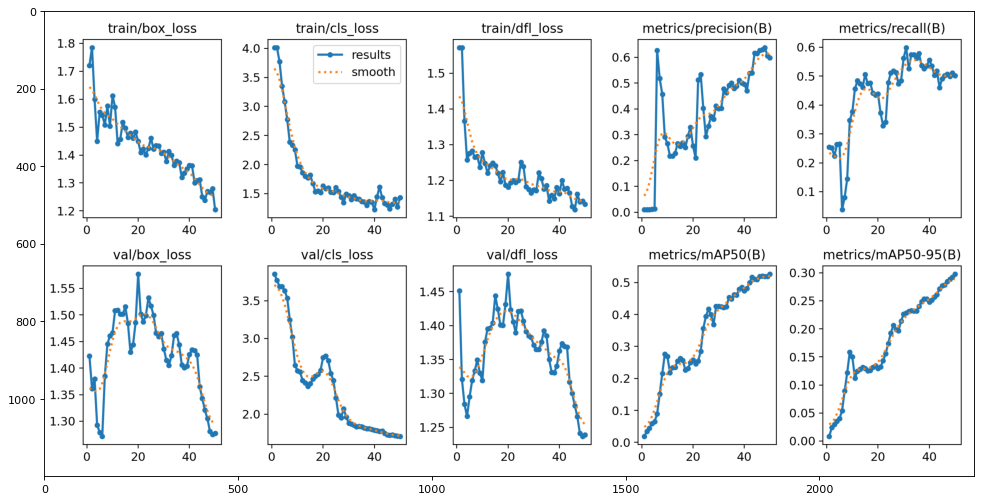

In [8]:
figure(figsize=(15, 10), dpi=80)
# reading the image 
results = img.imread("../Rough Work/runs/detect/train9/results.png")   
# displaying the image 
plt.imshow(results) 

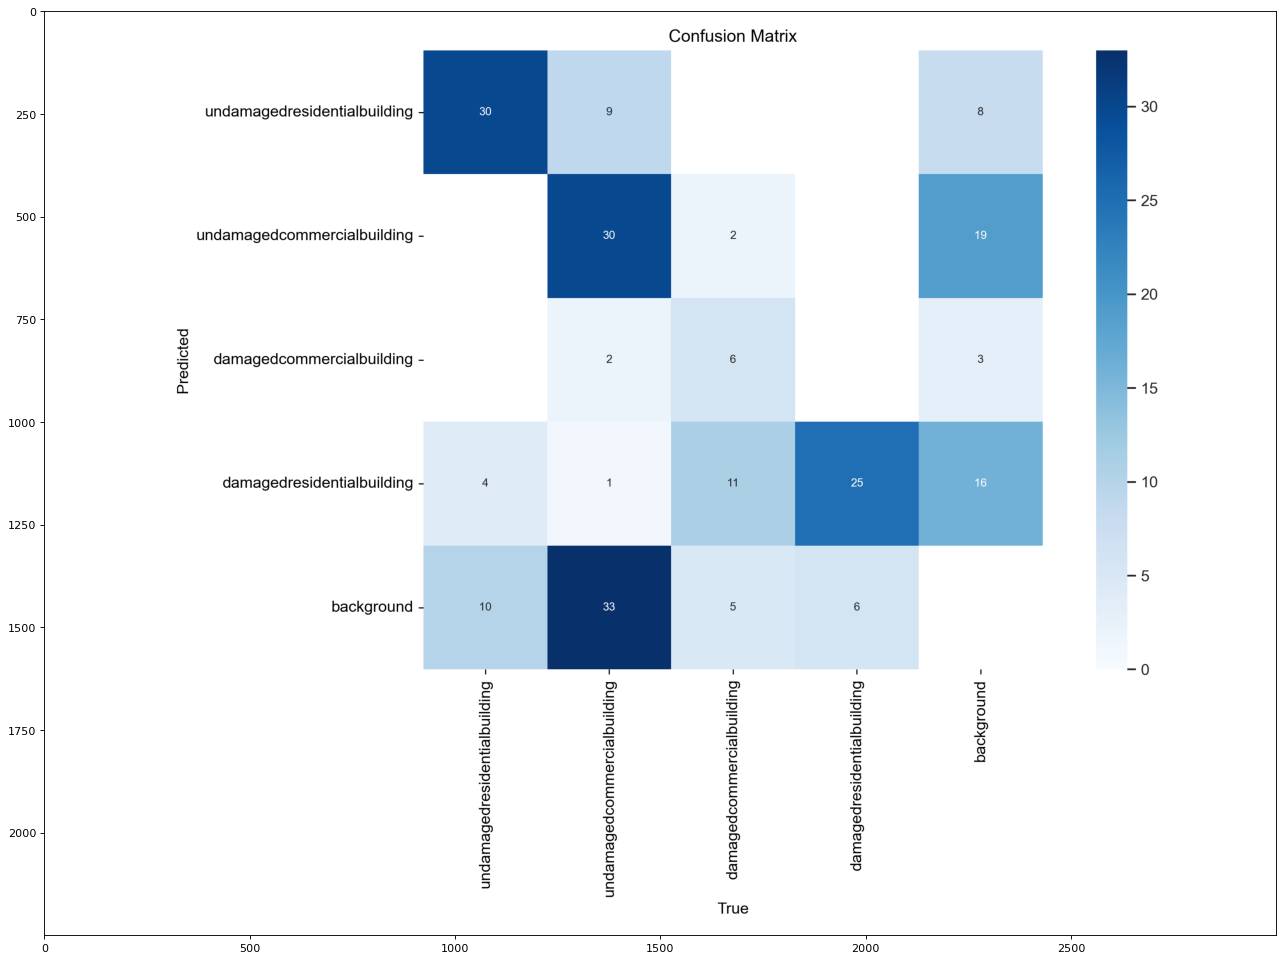

In [9]:
figure(figsize=(20,15), dpi=80)  
# reading the image 
cf = img.imread("../Rough Work/runs/detect/train9/confusion_matrix.png") 
# displaying the image 
plt.imshow(cf) 

# Making Predictions

In [10]:
model = YOLO('runs/detect/train9/weights/best.pt')

In [11]:
print("Current working directory: ", os.getcwd())

Current working directory:  t:\EY_Challenge\EY_Challenge\Rough Work


In [12]:
def unzip_folder(zip_filepath, dest_dir):
    with zipfile.ZipFile(zip_filepath, 'r') as zip_ref:
        zip_ref.extractall(dest_dir)
    print(f'The zip file {zip_filepath} has been extracted to the directory {dest_dir}')



submission_zip = './challenge_1_submission_images.zip'
submission_directory = './challenge_1_submission_images'
unzip_folder(submission_zip,submission_directory)

The zip file ./challenge_1_submission_images.zip has been extracted to the directory ./challenge_1_submission_images


In [15]:
# Decoding according to the .yaml file class names order
decoding_of_predictions ={1: 'undamagedcommercialbuilding', 0: 'undamagedresidentialbuilding', 3: 'damagedresidentialbuilding', 2: 'damagedcommercialbuilding'}

directory = './challenge_1_submission_images/Validation_Data_JPEG'
# Directory to store outputs
results_directory = 'Validation_Data_Results'

# Create submission directory if it doesn't exist
if not os.path.exists(results_directory):
    os.makedirs(results_directory)

# Loop through each file in the directory
for filename in os.listdir(directory):
    # Check if the current object is a file and ends with .jpeg
    if os.path.isfile(os.path.join(directory, filename)) and filename.lower().endswith('.jpg'):
        # Perform operations on the file
        file_path = os.path.join(directory, filename)
        print(file_path)
        print("Making a prediction on ", filename)
        results = model.predict(file_path, save=True, iou=0.5, save_txt=True, conf=0.25)
        
        for r in results:
            conf_list = r.boxes.conf.cpu().numpy().tolist()  # Move tensor to CPU before converting
            clss_list = r.boxes.cls.cpu().numpy().tolist()  # Move tensor to CPU before converting
            original_list = clss_list
            updated_list = []
            for element in original_list:
                updated_list.append(decoding_of_predictions[int(element)])

        bounding_boxes = r.boxes.xyxy.cpu().numpy()  # Move tensor to CPU before converting
        confidences = conf_list
        class_names = updated_list


        # Check if bounding boxes, confidences and class names match
        if len(bounding_boxes) != len(confidences) or len(bounding_boxes) != len(class_names):
            print("Error: Number of bounding boxes, confidences, and class names should be the same.")
            continue
        text_file_name = os.path.splitext(filename)[0]
        # Creating a new .txt file for each image in the submission_directory
        with open(os.path.join(results_directory, f"{text_file_name}.txt"), "w") as file:
            for i in range(len(bounding_boxes)):
                # Get coordinates of each bounding box
                left, top, right, bottom = bounding_boxes[i]
                # Write content to file in desired format
                file.write(f"{class_names[i]} {confidences[i]} {left} {top} {right} {bottom}\n")
        print("Output files generated successfully.")


./challenge_1_submission_images/Validation_Data_JPEG\Validation_Post_Event_001.jpg
Making a prediction on  Validation_Post_Event_001.jpg

image 1/1 t:\EY_Challenge\EY_Challenge\Rough Work\challenge_1_submission_images\Validation_Data_JPEG\Validation_Post_Event_001.jpg: 512x512 1 undamagedresidentialbuilding, 19 damagedresidentialbuildings, 9.5ms
Speed: 2.0ms preprocess, 9.5ms inference, 1.0ms postprocess per image at shape (1, 3, 512, 512)
Results saved to runs\detect\predict3
12 labels saved to runs\detect\predict3\labels
Output files generated successfully.
./challenge_1_submission_images/Validation_Data_JPEG\Validation_Post_Event_002.jpg
Making a prediction on  Validation_Post_Event_002.jpg

image 1/1 t:\EY_Challenge\EY_Challenge\Rough Work\challenge_1_submission_images\Validation_Data_JPEG\Validation_Post_Event_002.jpg: 512x512 7 damagedresidentialbuildings, 8.0ms
Speed: 0.0ms preprocess, 8.0ms inference, 1.0ms postprocess per image at shape (1, 3, 512, 512)
Results saved to runs\d

In [16]:
# Define your source directory and the destination where the zip file will be created
source_dir = results_directory
destination_zip = 'submission'

# Create a zip file from the directory
shutil.make_archive(destination_zip, 'zip', source_dir)

print(f"Directory {source_dir} has been successfully zipped into {destination_zip}.")

Directory Validation_Data_Results has been successfully zipped into submission.
